
### TEXT CLASSIFICATION FOR ALCOHOLIC POSTS





First of all, we have prepared our data ourself.
We looked on forums in hebrew, and we selected:
- 100 texts of people that are alcohol dependant.
- 100 texts of people that are not alcoholic. These texts include some words like 'alcohol' but is not from alcoholic person.
We connect to the drive to import our data

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this code, we have performed the following steps:

1. Imported Libraries: We imported various libraries including LSTM, pandas,
numpy, sklearn, stopwordsiso, transformers, and others.

2. Text Preprocessing: We utilized the nltk library to tokenize words and remove stopwords in Hebrew. We also downloaded required resources using nltk.download().

3. TF-IDF Vectorization: We used the TfidfVectorizer from sklearn to transform text data into a numerical representation (TF-IDF vectors).

5. Text Tokenization: We used the Tokenizer class from TensorFlow to tokenize text data and prepare it for input to a neural network.

6. Data Splitting: We split the data into training and testing sets using train_test_split from sklearn.

7. Data Preprocessing: We performed data preprocessing including one-hot encoding of labels and other necessary steps.

8. Model Building: We constructed a neural network model using the Sequential API from TensorFlow's Keras. We experimented with different layer types including GRU, MLP, RNN, LSTM, and Bidirectional LSTM, as well as adding Dense and Flatten layers. We also tried we a transformer HeBert.


9. Embedding: We experimented with adding an Embedding layer and without in the models.

10. Model Training and Evaluation: We compiled and trained the model using the training data. We evaluated the model's performance using metrics such as accuracy and loss.

11. Visualization: We utilized matplotlib to visualize the training, using graphics.



Overall, we've performed text preprocessing, vectorized the text data, built, trained, and evaluated a neural network model for text classification on Hebrew text data. We've experimented with different model architectures to find the one that best suits the task of text classification.







## Importing librairies

In [14]:
!pip install dplython
#!pip install tidytext
!pip install stopwordsiso
!pip install transformers
!pip install pandas==1.3.5
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('hebrew')
import glob
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from stopwordsiso import stopwords
from sklearn.model_selection import train_test_split
import glob
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Bidirectional
import matplotlib.pyplot as plt
from keras.layers import Flatten
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import re
import seaborn as sns
from tensorflow.keras.layers import Embedding, LSTM, Dense


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text preprocessing

We started by preparing our data for text classification. First, we gathered text data from both "alcoolique" and "non_alcoolique" categories, stored in separate directories. We loaded text files from each directory, extracted their content, and created two separate dataframes for each category. We labeled the "alcoolique" texts as such and similarly labeled the "non_alcoolique" texts. Then, we combined these dataframes into a single "posts" dataframe containing both categories' texts and labels.

In [15]:
#ALCOOLIQUE

DATA_DIR_alcol = "/content/drive/MyDrive/deep_learning/alcol_posts/"


# Liste des fichiers texte dans le répertoire data dir c le chemin , etoile c nimporte quel caractere et tous les fichiers qui sont dans le fichier avec le lien au dessus et qui finissent par . txt
txt_files = glob.glob(DATA_DIR_alcol + "*.txt")
# Initialisation du tableau alcoolique , tableau a 3 colonnes
alcoolique = pd.DataFrame(columns=["text", "id"])

# Boucle sur les fichiers texte , on a ouvert le premier fichier avec lencding macintoch
for f in txt_files:
    with open(f, "r") as file:
        # Lecture du contenu du fichier
        content = file.read()
        # Ajout du contenu au tableau alcoolique pour creer une colonne ou ya ecrit alcoolique
        alcoolique = alcoolique.append({"text": content, "id": f.replace(DATA_DIR_alcol, "").replace(".txt", "").replace("sample","")}, ignore_index=True)
label_alc = ["alcoolique"] * 100
alcoolique["lab"] = label_alc


#NON ALCOOLIQUE

DATA_DIR_non_alcol = "/content/drive/MyDrive/deep_learning/non_alcol_posts/"

# Pareille pour non_alcolique
txt_files_non = glob.glob(DATA_DIR_non_alcol + "*.txt")
non_alcoolique = pd.DataFrame(columns=["text", "id"])
for f in txt_files_non:
    with open(f, "r") as file:
        content = file.read()
        non_alcoolique = non_alcoolique.append({"text": content, "id": f.replace(DATA_DIR_non_alcol, "").replace(".txt", "").replace("sample","")}, ignore_index=True)
label_nonalc = ["non_alcoolique"] * 100
non_alcoolique["lab"] = label_nonalc


#POSTS EST UNE CONCATENATION DE ALCOOLIQUE ET NON ALCOOLIQUE
posts = pd.concat([alcoolique, non_alcoolique])

#make this example reproducible
np.random.seed(1)
print(posts.iloc[0]['text'])

﻿בעבר הייתי משתמשת בממריצים ומרבה לשתות כשהייתי צעירה ופוחזת. כיום אני אמא ל2 קטנטנות. עובדת ואמא מסורה, אוהבת ואחראית. ועדיין בתדירות כזאת או אחרת עושה שימוש לא ראוי בריטלין וגם שותה. כבר 15 שנה שאני לא מצליחה באמת להימנע מזה. אני במודעות ולכן לא מתדרדרת באופן קיצוני. מה גם שזה באמת עושה לי רע. המחירים כבדים. זה די נסתר כי אין ביני לבין בעלי אינטראקציה פתוחה ותומכת. אני רוצה לחדול ! חוששת שהגוף שלי כבר ישלם מחירים בלתי הפיכים. וזה טיפשי ! רוצה סוף סוף לדבר על זה בפתיחות ולהפסיק להיות ב״מלחמה״ הזאת לבד.



We performed text preprocessing on our text data for classification. Using a translation table, we removed punctuation from the text and replaced numbers and English letters with empty spaces. Then, we split the text into words, removed stop words in hebrew, also we added some others stop_words, and rejoined the words. We split our data into training, validation, and test sets using the train_test_split function. Next, we employed TF-IDF vectorization to convert the textual data into numerical features. We used TfidfVectorizer to create TF-IDF matrices for our training, validation, and test data. Additionally, we used a label encoder to convert **alcoolique** or **non_alcoolique** labels into numerical values (0 or 1) for training, validation, and test sets.

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is a text processing technique that is used to convert a collection of text documents into a matrix of numerical features. It's a method in natural language processing and information retrieval for representing the importance of words in a document relative to a corpus of documents.

Here's how TF-IDF works step by step:

Term Frequency (TF): For each document, the number of times a word appears in that document is counted. This count is divided by the total number of words in the document to get the term frequency of that word in that document.

TF = (Number of times word appears in document) / (Total number of words in the document)

Inverse Document Frequency (IDF): IDF measures how unique or rare a word is across the entire corpus. It's calculated as the logarithm of the total number of documents divided by the number of documents containing the word. This helps give more weight to words that are less common.

IDF = log(N / D)

where N is the total number of documents and D is the number of documents containing the word.

TF-IDF Weighting: The TF-IDF score of a word in a specific document is obtained by multiplying its term frequency (TF) with its inverse document frequency (IDF). This score quantifies the importance of a word within a document relative to its importance across the entire corpus.

TF-IDF = TF * IDF

Vectorization: The TF-IDF scores for all the words in each document are combined to create a vector representation of that document.

In summary, TF-IDF gives higher scores to words that appear frequently in a document but are relatively rare across all documents. This helps in capturing the distinguishing characteristics of documents within a corpus.

When we use TfidfVectorizer from libraries like scikit-learn, it automates the process of calculating TF-IDF scores and transforming text data into numerical matrices. This transformed data can then be used as input for machine learning algorithms.







In [16]:
import string
# Preprocessing the text data
translator = str.maketrans("", "", string.punctuation)
data_X = []

for i in range(len(posts)):
    review = posts.iloc[i]['text'].translate(translator)
    review = re.sub('[0-9]+', '', review)
    review = re.sub('[a-zA-Z]+', '', review)
    review = review.split()
    review = [word for word in review if word not in stop_words]
    review = ' '.join(review)
    #print(i,review)
    data_X.append(review)

# Splitting the data
X_train1, X_temp1, y_train_tf, y_temp1 = train_test_split(data_X, posts['lab'], test_size=0.2, random_state=42)
X_val1, X_test1, y_val_tf, y_test_tf = train_test_split(X_temp1, y_temp1, test_size=0.5, random_state=42)

# TF-IDF Vectorization
tr_idf_model = TfidfVectorizer()
X_train_tf = tr_idf_model.fit_transform(X_train1)
X_train_tf = X_train_tf.toarray()

X_test_tf = tr_idf_model.transform(X_test1)
X_test_tf = X_test_tf.toarray()

X_val_tf = tr_idf_model.transform(X_val1)
X_val_tf = X_val_tf.toarray()

from sklearn.preprocessing import LabelEncoder

# Convertir les étiquettes en valeurs numériques
label_encoder = LabelEncoder()
y_train_tf = label_encoder.fit_transform(y_train_tf)
y_val_tf = label_encoder.transform(y_val_tf)
y_test_tf = label_encoder.transform(y_test_tf)

With the tf_idf startegy, we also would like to try with bag of words.
 This code snippet is performing tokenization and vectorization of the text data using the Keras Tokenizer. Here's an explanation of each step:

1. Tokenization:
Tokenization is the process of breaking down text into individual words or tokens. In this case, the text data from the 'text' column of the 'posts' DataFrame is tokenized. The Tokenizer learns the vocabulary of words from the provided text data and assigns a unique integer index to each word.

2. Text to Matrix Conversion (Vectorization):
After tokenization, the text data is transformed into a matrix format where each row corresponds to a document (text) and each column represents a word in the vocabulary. The value in the matrix indicates the presence ( the value 1) or a abcense (the value 0) of a word in a specific document.

3. Spliting the data into training, testing and validation data.

4. Label Encoding:
Labels ('lab' column) are categorical data that need to be converted into numeric form for machine learning algorithms. The LabelEncoder from scikit-learn is used to encode the labels into numerical values.

In [17]:
# Tokenize the training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(posts['text'])
X=tokenizer.texts_to_matrix(posts['text'])
word_index=tokenizer.word_index

X_train, X_temp, y_train, y_temp = train_test_split(X, posts['lab'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

We define a function called plot_history that takes a training history object as input. This function is designed to create a side-by-side comparison of training and validation accuracy as well as training and validation loss during the training process of a neural network model.

This function helps visualize the progress and performance of the training process by plotting accuracy and loss curves for both training and validation datasets.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

##MLP without embedding with Bag of words method

Epoch 1/15
5/5 [==============================] - 3s 191ms/step - loss: 0.6789 - accuracy: 0.5500 - val_loss: 0.6699 - val_accuracy: 0.4500
Epoch 2/15
5/5 [==============================] - 0s 31ms/step - loss: 0.6105 - accuracy: 0.6125 - val_loss: 0.6450 - val_accuracy: 0.4500
Epoch 3/15
5/5 [==============================] - 0s 34ms/step - loss: 0.5170 - accuracy: 0.8188 - val_loss: 0.6091 - val_accuracy: 0.5500
Epoch 4/15
5/5 [==============================] - 0s 32ms/step - loss: 0.4205 - accuracy: 0.9187 - val_loss: 0.5632 - val_accuracy: 0.6500
Epoch 5/15
5/5 [==============================] - 0s 29ms/step - loss: 0.3317 - accuracy: 0.9875 - val_loss: 0.5123 - val_accuracy: 0.7000
Epoch 6/15
5/5 [==============================] - 0s 36ms/step - loss: 0.2491 - accuracy: 0.9875 - val_loss: 0.4554 - val_accuracy: 0.8500
Epoch 7/15
5/5 [==============================] - 0s 33ms/step - loss: 0.1728 - accuracy: 0.9875 - val_loss: 0.3986 - val_accuracy: 0.9000
Epoch 8/15
5/5 [==========

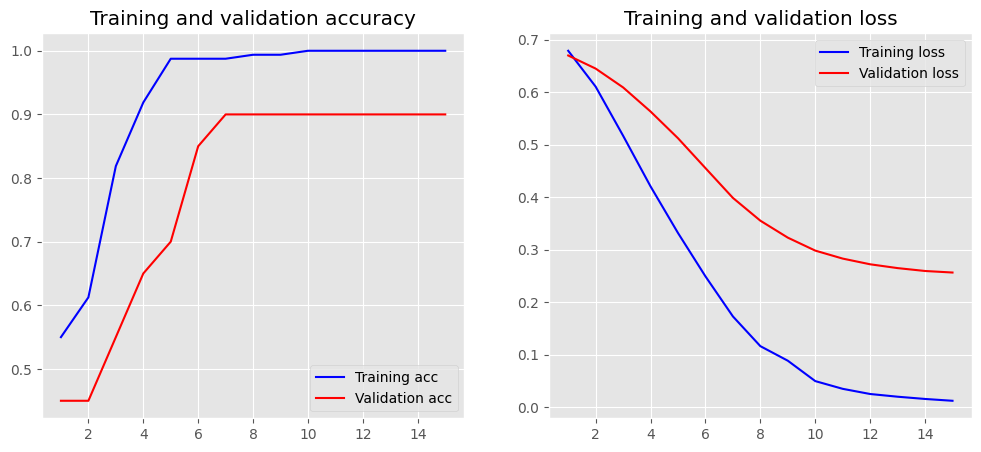

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Création du modèle
model = Sequential()

# Ajout de la couche d'embedding
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajustez le taux de dropout selon vos besoins
model.add(Dense(64, activation='relu'))

# Couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

# Évaluation sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
plot_history(history)


## MLP bag of words with embedding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Création du modèle
model = Sequential()

# Ajout de la couche d'embedding
vocab_size = len(tr_idf_model.vocabulary_)
embedding_dim = 100  # Ajustez la dimension selon vos besoins
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train.shape[1]))

# Ajout des couches cachées
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajustez le taux de dropout selon vos besoins
model.add(Dense(64, activation='relu'))

# Couche de sortie
model.add(Dense(1, activation='sigmoid'))  # Si vous faites de la classification binaire

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition du EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

# Évaluation sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/15
5/5 [==============================] - 11s 2s/step - loss: 3.6925 - accuracy: 0.4750 - val_loss: 2.4914 - val_accuracy: 0.6000
Epoch 2/15
5/5 [==============================] - 13s 2s/step - loss: 3.4443 - accuracy: 0.5250 - val_loss: 5.0195 - val_accuracy: 0.4000
Epoch 3/15
5/5 [==============================] - 13s 3s/step - loss: 2.4911 - accuracy: 0.4688 - val_loss: 0.6549 - val_accuracy: 0.8000
Epoch 4/15
5/5 [==============================] - 13s 2s/step - loss: 1.5537 - accuracy: 0.5188 - val_loss: 0.7213 - val_accuracy: 0.4000
Epoch 5/15
5/5 [==============================] - 14s 3s/step - loss: 0.8596 - accuracy: 0.5250 - val_loss: 0.7213 - val_accuracy: 0.4000
Epoch 6/15
5/5 [==============================] - 12s 3s/step - loss: 0.8106 - accuracy: 0.5125 - val_loss: 0.7063 - val_accuracy: 0.4000
Epoch 7/15
5/5 [==============================] - 10s 2s/step - loss: 0.6572 - accuracy: 0.6938 - val_loss: 0.6628 - val_accuracy: 0.7500
Epoch 8/15
5/5 [==================

##MLP with tf_idf method with embedding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Création du modèle
model = Sequential()

# Ajout de la couche d'embedding
vocab_size = len(tr_idf_model.vocabulary_)
embedding_dim = 100  # Ajustez la dimension selon vos besoins
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_tf.shape[1]))

# Ajout des couches cachées
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajustez le taux de dropout selon vos besoins
model.add(Dense(64, activation='relu'))

# Couche de sortie
model.add(Dense(1, activation='sigmoid'))  # Si vous faites de la classification binaire

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition du EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(X_train_tf, y_train_tf, epochs=15, batch_size=32, validation_data=(X_val_tf, y_val_tf))

# Évaluation sur l'ensemble de test
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/15
5/5 [==============================] - 9s 2s/step - loss: 2.2477 - accuracy: 0.4563 - val_loss: 0.7742 - val_accuracy: 0.6000
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 1.5434 - accuracy: 0.4812 - val_loss: 0.6898 - val_accuracy: 0.6000
Epoch 3/15
5/5 [==============================] - 5s 1s/step - loss: 1.4588 - accuracy: 0.4625 - val_loss: 0.7406 - val_accuracy: 0.4000
Epoch 4/15
5/5 [==============================] - 8s 2s/step - loss: 1.0146 - accuracy: 0.5063 - val_loss: 0.6973 - val_accuracy: 0.4000
Epoch 5/15
5/5 [==============================] - 5s 1s/step - loss: 0.7596 - accuracy: 0.5437 - val_loss: 0.6749 - val_accuracy: 0.6000
Epoch 6/15
5/5 [==============================] - 5s 1s/step - loss: 0.7505 - accuracy: 0.5125 - val_loss: 0.7305 - val_accuracy: 0.4000
Epoch 7/15
5/5 [==============================] - 8s 2s/step - loss: 0.8038 - accuracy: 0.4500 - val_loss: 0.7071 - val_accuracy: 0.4000
Epoch 8/15
5/5 [=========================

##MLP with tf_idf method without embedding





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Création du modèle
model = Sequential()

# Ajout de la couche d'embedding
vocab_size = len(tr_idf_model.vocabulary_)
embedding_dim = 100  # Ajustez la dimension selon vos besoins
#model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_tf.shape[1]))

# Ajout des couches cachées
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajustez le taux de dropout selon vos besoins
model.add(Dense(64, activation='relu'))

# Couche de sortie
model.add(Dense(1, activation='sigmoid'))  # Si vous faites de la classification binaire

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition du EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(X_train_tf, y_train_tf, epochs=15, batch_size=32, validation_data=(X_val_tf, y_val_tf))

# Évaluation sur l'ensemble de test
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/15
5/5 [==============================] - 1s 64ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6899 - val_accuracy: 0.7000
Epoch 2/15
5/5 [==============================] - 0s 21ms/step - loss: 0.6829 - accuracy: 0.8125 - val_loss: 0.6864 - val_accuracy: 0.7000
Epoch 3/15
5/5 [==============================] - 0s 16ms/step - loss: 0.6654 - accuracy: 0.9750 - val_loss: 0.6804 - val_accuracy: 0.7000
Epoch 4/15
5/5 [==============================] - 0s 17ms/step - loss: 0.6435 - accuracy: 0.9937 - val_loss: 0.6696 - val_accuracy: 0.8000
Epoch 5/15
5/5 [==============================] - 0s 24ms/step - loss: 0.6070 - accuracy: 0.9937 - val_loss: 0.6530 - val_accuracy: 0.7500
Epoch 6/15
5/5 [==============================] - 0s 17ms/step - loss: 0.5579 - accuracy: 0.9937 - val_loss: 0.6294 - val_accuracy: 0.7500
Epoch 7/15
5/5 [==============================] - 0s 16ms/step - loss: 0.4857 - accuracy: 0.9937 - val_loss: 0.6001 - val_accuracy: 0.6500
Epoch 8/15
5/5 [===========

*italicized text*

##Lstm with tf_idf method with embedding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Creating the model
model = Sequential()

# Adding the embedding layer
vocab = X_train_tf.shape[1]
embedding_dim = 100  # Adjust the dimension as needed
model.add(Embedding(input_dim=vocab, output_dim=embedding_dim, input_length=X_train_tf.shape[1]))

# Adding the LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(LSTM(64))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
history = model.fit(X_train_tf, y_train_tf, epochs=10, batch_size=64, validation_data=(X_val_tf, y_val_tf))

# Evaluating on the test set
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
3/3 [==============================] - 90s 27s/step - loss: 0.6971 - accuracy: 0.4938 - val_loss: 0.6975 - val_accuracy: 0.4000
Epoch 2/10
3/3 [==============================] - 75s 25s/step - loss: 0.6937 - accuracy: 0.4750 - val_loss: 0.6907 - val_accuracy: 0.6000
Epoch 3/10
3/3 [==============================] - 74s 22s/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.6893 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 75s 22s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6900 - val_accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 80s 25s/step - loss: 0.6935 - accuracy: 0.5063 - val_loss: 0.6909 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 74s 25s/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6902 - val_accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 75s 24s/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6899 - val_accuracy: 0.6000
Epoch 8/10
3/3 [===========

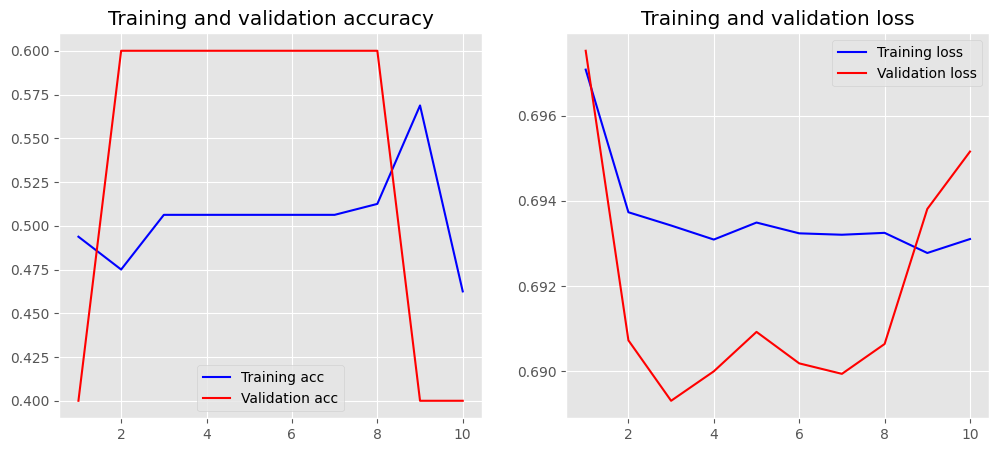

In [ ]:
plot_history(history)

##LSTM using bag of words method with embedding



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Creating the model
model = Sequential()

# Adding the embedding layer
vocab_size = len(word_index)
embedding_dim = 100
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train.shape[1]))

# Adding the LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(LSTM(64))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_val, y_val))

# Evaluating on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/15
3/3 [==============================] - 103s 30s/step - loss: 0.6955 - accuracy: 0.4500 - val_loss: 0.6894 - val_accuracy: 0.6000
Epoch 2/15
3/3 [==============================] - 97s 31s/step - loss: 0.6936 - accuracy: 0.5063 - val_loss: 0.6882 - val_accuracy: 0.6000
Epoch 3/15
3/3 [==============================] - 96s 30s/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6865 - val_accuracy: 0.6000
Epoch 4/15
3/3 [==============================] - 97s 31s/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6874 - val_accuracy: 0.6000
Epoch 5/15
3/3 [==============================] - 99s 32s/step - loss: 0.6929 - accuracy: 0.5063 - val_loss: 0.6894 - val_accuracy: 0.6000
Epoch 6/15
3/3 [==============================] - 101s 29s/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6903 - val_accuracy: 0.6000
Epoch 7/15
3/3 [==============================] - 101s 30s/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.6000
Epoch 8/15
3/3 [========

##LSTM tf_idf without embedding

In [ ]:

from keras.engine.training import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Créer un modèle séquentiel
model_lstm = Sequential()
# Ajouter une couche LSTM avec 16 neurones et la fonction d'activation ReLU
model_lstm.add(LSTM(16, activation='tanh', input_shape=(X_train_tf.shape[1], 1), return_sequences=True))
model_lstm.add(Dropout(0.2))

# Ajouter une deuxième couche LSTM avec 32 neurones et la fonction d'activation ReLU
model_lstm.add(LSTM(64, activation='tanh'))
model_lstm.add(Dropout(0.2))

# Ajouter une couche cachée avec 32 neurones et la fonction d'activation ReLU
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))

# Ajouter une couche de sortie avec une fonction d'activation Sigmoid
model_lstm.add(Dense(1, activation='sigmoid'))

optimizer= optimizers.Adam(learning_rate=0.001)

# Compiler le modèle avec l'optimiseur Adam et la fonction de perte binary_crossentropy
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Adapter le modèle aux données d'entraînement
model_lstm.fit(X_train_tf.reshape(X_train_tf.shape[0],X_train_tf.shape[1], 1), y_train_tf, epochs=10, batch_size=128, verbose=False, validation_data=(X_val_tf.reshape(X_val_tf.shape[0],X_val_tf.shape[1], 1), y_val_tf))

# Évaluer la performance du modèle sur les données de test
evaluate_model_lstm = model_lstm.evaluate(X_test_tf.reshape(X_test_tf.shape[0],X_test_tf.shape[1], 1), y_test_tf)


# Afficher la performance du modèle
print("Loss: ", evaluate_model_lstm[0])
print("Accuracy: ", evaluate_model_lstm[1])


1/1 [==============================] - 1s 735ms/step - loss: 0.6924 - accuracy: 0.6500
Loss:  0.6924422383308411
Accuracy:  0.6499999761581421


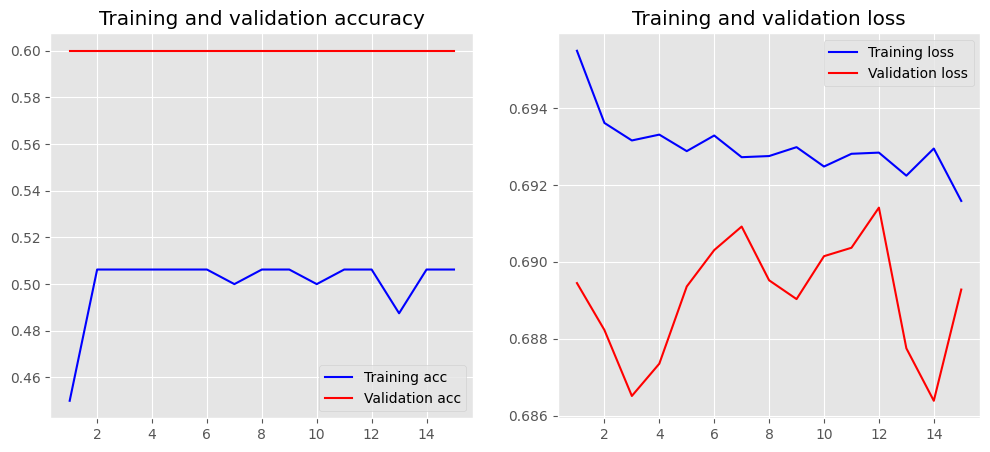

In [ ]:
plot_history(history)

##LSTM with bag of words method without embedding

In [ ]:

from keras.engine.training import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Créer un modèle séquentiel
model_lstm = Sequential()
# Ajouter une couche LSTM avec 16 neurones et la fonction d'activation ReLU
model_lstm.add(LSTM(16, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True))
model_lstm.add(Dropout(0.2))

# Ajouter une deuxième couche LSTM avec 32 neurones et la fonction d'activation ReLU
model_lstm.add(LSTM(64, activation='tanh'))
model_lstm.add(Dropout(0.2))

# Ajouter une couche cachée avec 32 neurones et la fonction d'activation ReLU
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))

# Ajouter une couche de sortie avec une fonction d'activation Sigmoid
model_lstm.add(Dense(1, activation='sigmoid'))

optimizer= optimizers.Adam(learning_rate=0.001)

# Compiler le modèle avec l'optimiseur Adam et la fonction de perte binary_crossentropy
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Adapter le modèle aux données d'entraînement
model_lstm.fit(X_train.reshape(X_train.shape[0],X_train.shape[1], 1), y_train, epochs=10, batch_size=128, verbose=False, validation_data=(X_val.reshape(X_val.shape[0],X_val.shape[1], 1), y_val))

# Évaluer la performance du modèle sur les données de test
evaluate_model_lstm = model_lstm.evaluate(X_test.reshape(X_test.shape[0],X_test.shape[1], 1), y_test)


# Afficher la performance du modèle
print("Loss: ", evaluate_model_lstm[0])
print("Accuracy: ", evaluate_model_lstm[1])


1/1 [==============================] - 1s 869ms/step - loss: 0.6912 - accuracy: 0.6500
Loss:  0.6911920309066772
Accuracy:  0.6499999761581421




## GRU with Bag of word method with embedding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Creating the model
model = Sequential()

# Adding the embedding layer
vocab_size = len(word_index)
embedding_dim = 100  # Adjust the dimension as needed
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train.shape[1]))

# Adding the LSTM layer
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(GRU(64))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluating on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
3/3 [==============================] - 90s 27s/step - loss: 0.6931 - accuracy: 0.4812 - val_loss: 0.6903 - val_accuracy: 0.6000
Epoch 2/10
3/3 [==============================] - 86s 27s/step - loss: 0.6933 - accuracy: 0.5125 - val_loss: 0.6903 - val_accuracy: 0.6000
Epoch 3/10
3/3 [==============================] - 84s 26s/step - loss: 0.6940 - accuracy: 0.4625 - val_loss: 0.6922 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 80s 25s/step - loss: 0.6941 - accuracy: 0.4750 - val_loss: 0.6900 - val_accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 85s 27s/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6900 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 86s 26s/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6884 - val_accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 82s 25s/step - loss: 0.6915 - accuracy: 0.5063 - val_loss: 0.6897 - val_accuracy: 0.6000
Epoch 8/10
3/3 [===========

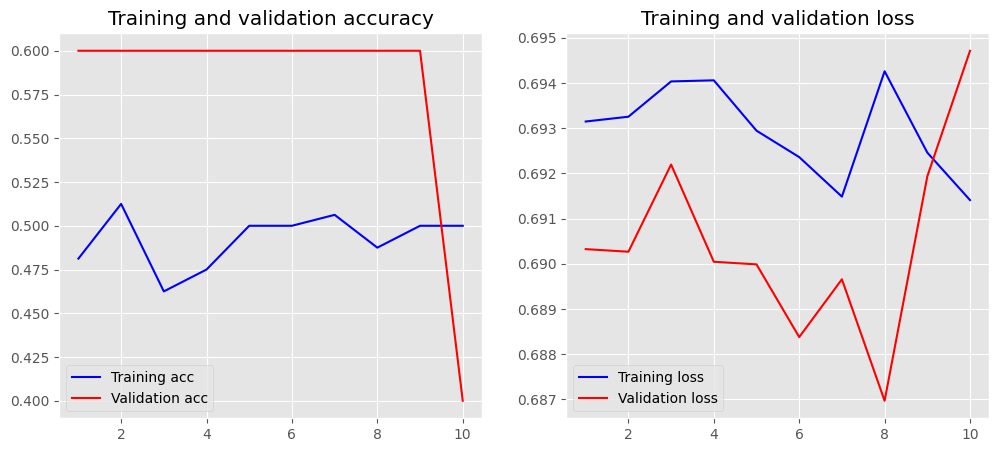

In [ ]:
plot_history(history)

## GRU with tf_idf method with embedding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Creating the model
model = Sequential()

# Adding the embedding layer
vocab_size=len(word_index)
embedding_dim = 100  # Adjust the dimension as needed
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_tf.shape[1]))

# Adding the LSTM layer
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(GRU(64))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history = model.fit(X_train_tf, y_train_tf, epochs=10, batch_size=32, validation_data=(X_val_tf, y_val_tf))

# Evaluating on the test set
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
5/5 [==============================] - 72s 14s/step - loss: 0.6950 - accuracy: 0.5125 - val_loss: 0.6911 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 65s 13s/step - loss: 0.6929 - accuracy: 0.4938 - val_loss: 0.6934 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 64s 13s/step - loss: 0.6943 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 67s 13s/step - loss: 0.6951 - accuracy: 0.4500 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 66s 13s/step - loss: 0.6936 - accuracy: 0.4563 - val_loss: 0.6899 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 63s 13s/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6848 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 66s 13s/step - loss: 0.6935 - accuracy: 0.5125 - val_loss: 0.6896 - val_accuracy: 0.6000
Epoch 8/10
5/5 [===========

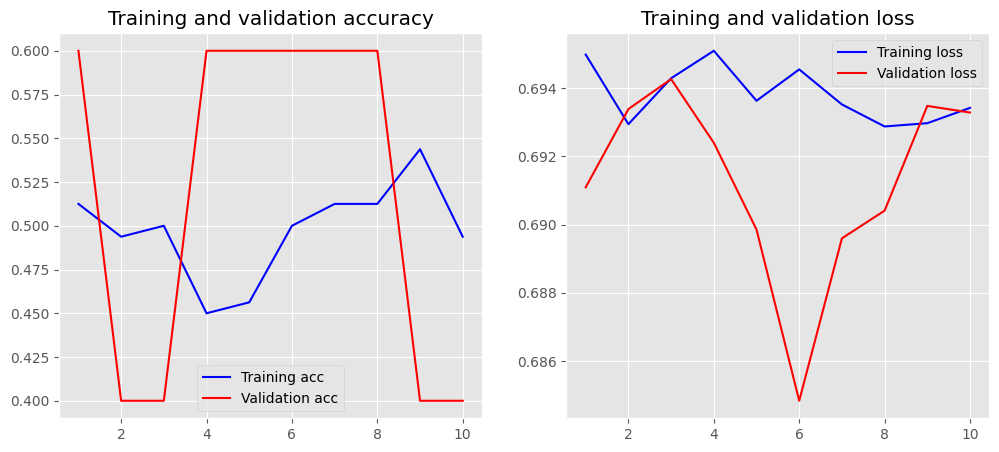

In [ ]:
plot_history(history)

## GRU for bag of words without embedding

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_GRU = tf.keras.Sequential([
    tf.keras.layers.GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model_GRU.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

evaluate_model_GRU = model_GRU.evaluate(X_test, y_test)

# Afficher la performance du modèle
print("Loss: ", evaluate_model_GRU[0])
print("Accuracy: ", evaluate_model_GRU[1])


Epoch 1/2
5/5 [==============================] - 13s 2s/step - loss: 0.6934 - accuracy: 0.4750 - val_loss: 0.6964 - val_accuracy: 0.3500
Epoch 2/2
1/1 [==============================] - 0s 454ms/step - loss: 0.6962 - accuracy: 0.3500
Loss:  0.6962153911590576
Accuracy:  0.3499999940395355


## GRU tf-idf without *embedding*

In [ ]:
from keras.layers import Dense, GRU, Dropout
X_train_tf = X_train_tf.reshape(X_train_tf.shape[0], X_train_tf.shape[1], 1)
X_test_tf = X_test_tf.reshape(X_test_tf.shape[0], X_test_tf.shape[1], 1)

model_GRU = tf.keras.Sequential([
    tf.keras.layers.GRU(64, input_shape=(X_train_tf.shape[1], X_train_tf.shape[2])),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model_GRU.fit(X_train_tf, y_train_tf, epochs=15, batch_size=64, validation_data=(X_test_tf, y_test_tf))

evaluate_model_GRU = model_GRU.evaluate(X_test_tf, y_test_tf)


# Afficher la performance du modèle
print("Loss: ", evaluate_model_GRU[0])
print("Accuracy: ", evaluate_model_GRU[1])

Epoch 1/15
3/3 [==============================] - 13s 3s/step - loss: 0.6933 - accuracy: 0.4938 - val_loss: 0.6969 - val_accuracy: 0.3500
Epoch 2/15
3/3 [==============================] - 7s 2s/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6969 - val_accuracy: 0.3500
Epoch 3/15
3/3 [==============================] - 10s 3s/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6955 - val_accuracy: 0.3500
Epoch 4/15
3/3 [==============================] - 7s 2s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6960 - val_accuracy: 0.3500
Epoch 5/15
3/3 [==============================] - 10s 3s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6960 - val_accuracy: 0.3500
Epoch 6/15
3/3 [==============================] - 7s 2s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6957 - val_accuracy: 0.3500
Epoch 7/15
3/3 [==============================] - 10s 4s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6961 - val_accuracy: 0.3500
Epoch 8/15
3/3 [=====================

In [ ]:
print("Accuracy: ", evaluate_model_GRU[1])

Accuracy:  0.3499999940395355


## RNN with tf_idf with embedding

In [ ]:
from keras.engine.training import optimizers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Créer un modèle séquentiel
model_rnn = Sequential()

model_rnn.add(Embedding(input_dim=10000, output_dim=64, input_length=X_train_tf.shape[1]))

# Ajouter une couche RNN avec 16 neurones et la fonction d'activation tanh
model_rnn.add(SimpleRNN(16, activation='tanh', return_sequences=True))
model_rnn.add(Dropout(0.2))

# Ajouter une deuxième couche RNN avec 64 neurones et la fonction d'activation tanh
model_rnn.add(SimpleRNN(64, activation='tanh'))
model_rnn.add(Dropout(0.2))

# Ajouter une couche cachée avec 64 neurones et la fonction d'activation ReLU
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.2))

# Ajouter une couche de sortie avec une fonction d'activation Sigmoid
model_rnn.add(Dense(1, activation='sigmoid'))

optimizer= optimizers.Adam(learning_rate=0.001)

# Compiler le modèle avec l'optimiseur Adam et la fonction de perte binary_crossentropy
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Adapter le modèle aux données d'entraînement
model_rnn.fit(X_train_tf, y_train_tf, epochs=20, batch_size=128, verbose=False, validation_data=(X_val_tf, y_val_tf))

# Évaluer la performance du modèle sur les données de test
evaluate_model_rnn = model_rnn.evaluate(X_val_tf, y_val_tf)

# Afficher la performance du modèle
print("Loss: ", evaluate_model_rnn[0])
print("Accuracy: ", evaluate_model_rnn[1])


1/1 [==============================] - 0s 387ms/step - loss: 0.7062 - accuracy: 0.4000
Loss:  0.7061932682991028
Accuracy:  0.4000000059604645


##RNN for bag of words method with embedding

In [ ]:
from keras.engine.training import optimizers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=X_train.shape[1]))
model_rnn.add(SimpleRNN(16, activation='tanh', return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(64, activation='tanh'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))
optimizer= optimizers.Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=10, batch_size=128, verbose=False, validation_data=(X_val, y_val), callbacks=[early_stop])
evaluate_model_rnn = model_rnn.evaluate(X_val, y_val)
print("Loss: ", evaluate_model_rnn[0])
print("Accuracy: ", evaluate_model_rnn[1])


1/1 [==============================] - 0s 439ms/step - loss: 0.6834 - accuracy: 0.6000
Loss:  0.6833565831184387
Accuracy:  0.6000000238418579


##RNN with tf_idf without embedding

In [ ]:
from keras.engine.training import optimizers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout


X_train_tf = X_train_tf.reshape(X_train_tf.shape[0], X_train_tf.shape[1], 1)
X_test_tf = X_test_tf.reshape(X_test_tf.shape[0], X_test_tf.shape[1], 1)

model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train_tf.shape[1], X_train_tf.shape[2])),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model_rnn.fit(X_train_tf, y_train_tf, epochs=15, batch_size=64, validation_data=(X_test_tf, y_test_tf))

evaluate_model_rnn = model_rnn.evaluate(X_test_tf, y_test_tf)


# Afficher la performance du modèle
print("Loss: ", evaluate_model_rnn[0])
print("Accuracy: ", evaluate_model_rnn[1])


Epoch 1/15
3/3 [==============================] - 4s 1s/step - loss: 0.6958 - accuracy: 0.4938 - val_loss: 0.7058 - val_accuracy: 0.5500
Epoch 2/15
3/3 [==============================] - 2s 857ms/step - loss: 0.6912 - accuracy: 0.5312 - val_loss: 0.6969 - val_accuracy: 0.4500
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6984 - accuracy: 0.4812 - val_loss: 0.7018 - val_accuracy: 0.4000
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 0.6945 - accuracy: 0.4563 - val_loss: 0.6936 - val_accuracy: 0.5500
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6936 - accuracy: 0.5312 - val_loss: 0.7024 - val_accuracy: 0.3500
Epoch 6/15
3/3 [==============================] - 2s 792ms/step - loss: 0.6963 - accuracy: 0.4375 - val_loss: 0.6971 - val_accuracy: 0.4000
Epoch 7/15
3/3 [==============================] - 2s 863ms/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.3000
Epoch 8/15
3/3 [================

##RNN with bag of words without embedding

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model_rnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

evaluate_model_rnn = model_rnn.evaluate(X_test, y_test)

# Afficher la performance du modèle
print("Loss: ", evaluate_model_rnn[0])
print("Accuracy: ", evaluate_model_rnn[1])


##Bidirectional LSTM for bag of words with embedding



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Creating the model
model = Sequential()

# Adding the embedding layer
vocab_size = len(word_index)
embedding_dim = 100  # Adjust the dimension as needed
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train.shape[1]))

# Adding the LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(Bidirectional(LSTM(64)))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Evaluating on the test set
loss, accuracy = model.evaluate(X_val, y_val)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/5
3/3 [==============================] - 246s 75s/step - loss: 0.6943 - accuracy: 0.4500 - val_loss: 0.6743 - val_accuracy: 0.7500
Epoch 2/5
3/3 [==============================] - 229s 74s/step - loss: 0.6885 - accuracy: 0.5750 - val_loss: 0.6637 - val_accuracy: 0.7500
Epoch 3/5
3/3 [==============================] - 226s 73s/step - loss: 0.6751 - accuracy: 0.6750 - val_loss: 0.6125 - val_accuracy: 0.8000
Epoch 4/5
3/3 [==============================] - 219s 71s/step - loss: 0.6537 - accuracy: 0.6500 - val_loss: 0.5546 - val_accuracy: 0.8000
Epoch 5/5
1/1 [==============================] - 6s 6s/step - loss: 0.5252 - accuracy: 0.8500
Test loss: 0.5251736640930176
Test accuracy: 0.8500000238418579


In [ ]:
# Evaluating on the test set
evaluate_model_rnn= model.evaluate(X_val, y_val)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

1/1 [==============================] - 9s 9s/step - loss: 0.5252 - accuracy: 0.8500
Test loss: 0.5251736640930176
Test accuracy: 0.8500000238418579


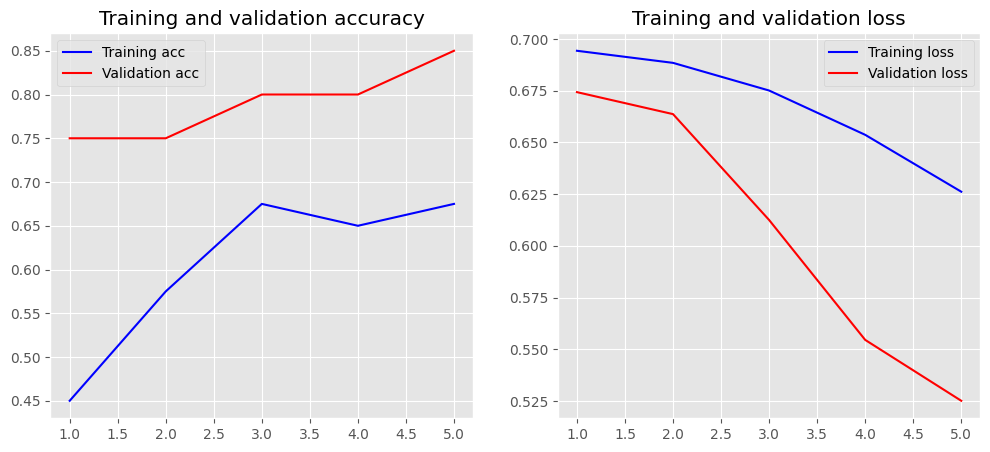

In [ ]:
plot_history(history)

##Bidirectional LSTM with tf_idf with embedding


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Creating the model
model = Sequential()

# Adding the embedding layer
vocab_size = len(word_index)
embedding_dim = 100  # Adjust the dimension as needed
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_tf.shape[1]))

# Adding the LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(Bidirectional(LSTM(64)))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Training the model
history = model.fit(X_train_tf, y_train_tf, epochs=10, batch_size=32, validation_data=(X_val_tf, y_val_tf))

# Evaluating on the test set
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
5/5 [==============================] - 237s 46s/step - loss: 0.6944 - accuracy: 0.4938 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 228s 47s/step - loss: 0.6946 - accuracy: 0.4187 - val_loss: 0.6948 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 232s 46s/step - loss: 0.6958 - accuracy: 0.4500 - val_loss: 0.6889 - val_accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 226s 46s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 222s 44s/step - loss: 0.6937 - accuracy: 0.4875 - val_loss: 0.6909 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 230s 46s/step - loss: 0.6940 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 225s 46s/step - loss: 0.6940 - accuracy: 0.4750 - val_loss: 0.6908 - val_accuracy: 0.6000
Epoch 8/10
5/5 [====

TypeError: ignored

In [ ]:
plot_history(history)

##Bidirectional LSTM with bag of words without embedding

In [ ]:

from keras.engine.training import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional

# Créer un modèle séquentiel
model_lstm = Sequential()
# Ajouter une couche LSTM avec 16 neurones et la fonction d'activation ReLU
model_lstm.add(Bidirectional(LSTM(16, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True)))
model_lstm.add(Dropout(0.2))

# Ajouter une deuxième couche LSTM avec 32 neurones et la fonction d'activation ReLU
model_lstm.add(Bidirectional(LSTM(64, activation='tanh')))
model_lstm.add(Dropout(0.2))

# Ajouter une couche cachée avec 32 neurones et la fonction d'activation ReLU
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))

# Ajouter une couche de sortie avec une fonction d'activation Sigmoid
model_lstm.add(Dense(1, activation='sigmoid'))

optimizer= optimizers.Adam(learning_rate=0.001)

# Compiler le modèle avec l'optimiseur Adam et la fonction de perte binary_crossentropy
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Adapter le modèle aux données d'entraînement
model_lstm.fit(X_train.reshape(X_train.shape[0],X_train.shape[1], 1), y_train, epochs=10, batch_size=128, verbose=False, validation_data=(X_val.reshape(X_val.shape[0],X_val.shape[1], 1), y_val))

# Évaluer la performance du modèle sur les données de test
evaluate_model_lstm = model_lstm.evaluate(X_test.reshape(X_test.shape[0],X_test.shape[1], 1), y_test)


# Afficher la performance du modèle
print("Loss: ", evaluate_model_lstm[0])
print("Accuracy: ", evaluate_model_lstm[1])


##Bidirectional LSTM with tf-idf without embedding

In [ ]:

from keras.engine.training import optimizers
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout

# Créer un modèle séquentiel
model = Sequential()
# Ajouter une couche GRU avec 16 neurones et la fonction d'activation ReLU
model.add(Bidirectional(LSTM(16, activation='tanh', input_shape=(X_train_tf.shape[1], 1), return_sequences=True)))
model.add(Dropout(0.2))

# Ajouter une deuxième couche GRU avec 32 neurones et la fonction d'activation ReLU
model.add(Bidirectional(LSTM(64, activation='tanh')))
model.add(Dropout(0.2))

# Ajouter une couche cachée avec 32 neurones et la fonction d'activation ReLU
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Ajouter une couche de sortie avec une fonction d'activation Sigmoid
model.add(Dense(1, activation='sigmoid'))

optimizer= optimizers.Adam(learning_rate=0.001)

# Compiler le modèle avec l'optimiseur Adam et la fonction de perte binary_crossentropy
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Adapter le modèle aux données d'entraînement
model.fit(X_train_tf.reshape(X_train_tf.shape[0],X_train_tf.shape[1], 1), y_train_tf, epochs=10, batch_size=128, verbose=False, validation_data=(X_val_tf.reshape(X_val_tf.shape[0],X_val_tf.shape[1], 1), y_val_tf))

# Évaluer la performance du modèle sur les données de test
evaluate_model = model.evaluate(X_test_tf.reshape(X_test_tf.shape[0],X_test_tf.shape[1], 1), y_test_tf)


# Afficher la performance du modèle
print("Loss: ", evaluate_model[0])
print("Accuracy: ", evaluate_model[1])


##HeBert


 We load a pre-trained Hugging Face model and tokenizer for sequence classification. the pre-trained model name is *tdklab/hebert-finetuned-hebrew-squad*. For that:

1. We first choose a Pre-trained Model Name:  "tdklab/hebert-finetuned-hebrew-squad" is a Hebrew language model fine-tuned for sequence classification.

2. Loading Tokenizer: The tokenizer is responsible for converting text into a format suitable for the model. It tokenizes the input text into smaller units (such as words or subwords) and converts them into numerical representations that the model can understand. The AutoTokenizer class is used to load the appropriate tokenizer for the chosen model.

3. Loading Model: The model itself is responsible for understanding the input data and making predictions. The TFAutoModelForSequenceClassification class is used to load the model. It's specifically designed for sequence classification tasks, meaning it can take a sequence of tokens and predict the class label alcoolique or non_alcoolique.


4. Tokenization and Encoding: The tokenizer takes the preprocessed text and converts it into tokens. These tokens are then encoded into numerical values that the model can work with. The tokenizer also handles padding, truncation, and other processing steps to ensure the input is suitable for the model's architecture.

In summary, loading a pre-trained Hugging Face model and tokenizer involves selecting the appropriate model name, loading the tokenizer to preprocess and tokenize text, loading the model designed for sequence classification tasks, and preparing the input data for the model by encoding it as numerical values.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.model_selection import train_test_split

# Load your data
# posts = pd.read_csv('your_data.csv')

# Preprocess your data
texts = posts['text'].tolist()
labels = posts['lab'].tolist()

# Convert labels to binary (0 or 1)

label_mapping = {"alcoolique": 0, "non_alcoolique": 1}
labels = [label_mapping[label] for label in labels]

# Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load the Hugging Face model and tokenizer
model_name = "tdklab/hebert-finetuned-hebrew-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

# Tokenize your text data using the Hugging Face tokenizer with an appropriate maximum sequence length
max_sequence_length = 250
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_val_tokens = tokenizer(X_val, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)


# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tokens["input_ids"], y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tokens["input_ids"], y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tokens["input_ids"], y_test))

# Define batch size
batch_size = 16

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['qa_outputs.weight', 'qa_outputs.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

Epoch 1/5
10/10 [==============================] - 405s 36s/step - loss: 6.6322 - accuracy: 0.5000 - val_loss: 6.0997 - val_accuracy: 0.6000
Epoch 2/5
10/10 [==============================] - 358s 36s/step - loss: 7.4155 - accuracy: 0.5063 - val_loss: 6.0997 - val_accuracy: 0.6000
Epoch 3/5
10/10 [==============================] - 357s 36s/step - loss: 7.5293 - accuracy: 0.5063 - val_loss: 6.0997 - val_accuracy: 0.6000
Epoch 4/5
10/10 [==============================] - 362s 36s/step - loss: 7.5293 - accuracy: 0.5063 - val_loss: 6.0997 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 13s 3s/step - loss: 9.9120 - accuracy: 0.3500
Test loss: 9.912004470825195
Test accuracy: 0.3499999940395355


## Hebert with LSTM



Loading Data: We start by loading the text data and labels. The text data is stored in the 'texts' variable, and the labels are stored in the 'labels' variable. These labels are then converted into binary labels (0 or 1) based on the 'label_mapping' dictionary.

Data Splitting: "We" split the data into three sets: training, validation, and test sets using the train_test_split function. The training set contains 80% of the data, while the validation and test sets each contain 10%.

Loading Hugging Face Model: "We" load a pre-trained Hugging Face model for Hebrew text classification. The model name is "tdklab/hebert-finetuned-hebrew-squad". Additionally, "we" initialize a tokenizer associated with this model using the AutoTokenizer class.

Tokenization: To prepare the text data for the model, "we" tokenize it using the Hugging Face tokenizer. This involves splitting the text into tokens (words or subwords), padding the sequences to a maximum length of 250, and returning the tokenized sequences as TensorFlow tensors.

Defining Input Dimension: "We" calculate the input dimension for the embedding layer. It is based on the vocabulary size of the tokenizer obtained using len(tokenizer.get_vocab()).

Creating TensorFlow Datasets: "We" create TensorFlow datasets for the training, validation, and test sets using tf.data.Dataset.from_tensor_slices(). These datasets pair the tokenized text sequences with their corresponding labels.

Batching Data: "We" batch the datasets into smaller batches (each with a batch size of 16) to facilitate efficient training and evaluation.

Model Definition: "We" define a sequential model. It consists of:

An Embedding layer: This layer learns dense representations of words based on the vocabulary size and embedding dimension.
An LSTM layer with 64 units: This recurrent layer captures sequential patterns in the text.
A Dense layer with one unit and a sigmoid activation function: This output layer performs binary classification.
Model Compilation: "We" compile the model by specifying the optimizer (Adam), loss function (binary cross-entropy), and evaluation metric (accuracy).

Model Training: "We" train the model for 5 epochs using the training dataset and validate its performance on the validation dataset. The goal is to minimize the loss and improve accuracy during training.

Model Evaluation: After training, "we" evaluate the model on the test dataset to assess its generalization performance. The results, including test loss and accuracy, are printed to the console.

This code demonstrates how "we" would preprocess text data, utilize a pre-trained model, tokenize the text, and build a deep learning model for text classification using TensorFlow/Keras.

In [6]:
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Load your data
# Preprocess your data
texts = posts['text'].tolist()
labels = posts['lab'].tolist()

# Convert labels to binary (0 or 1)

label_mapping = {"alcoolique": 0, "non_alcoolique": 1}
labels = [label_mapping[label] for label in labels]

# Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load the Hugging Face model and tokenizer
model_name = "tdklab/hebert-finetuned-hebrew-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

# Tokenize your text data using the Hugging Face tokenizer with an appropriate maximum sequence length
max_sequence_length = 250
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_val_tokens = tokenizer(X_val, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['qa_outputs.bias', 'qa_outputs.weight', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

In [34]:
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Load your data
# Preprocess your data
texts = posts['text'].tolist()
labels = posts['lab'].tolist()

# Convert labels to binary (0 or 1)

label_mapping = {"alcoolique": 0, "non_alcoolique": 1}
labels = [label_mapping[label] for label in labels]

# Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load the Hugging Face model and tokenizer
model_name = "tdklab/hebert-finetuned-hebrew-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

# Tokenize your text data using the Hugging Face tokenizer with an appropriate maximum sequence length
max_sequence_length = 250
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_val_tokens = tokenizer(X_val, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids', 'qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

In [32]:
from tensorflow.keras.layers import Embedding

# Define the input dimension based on the vocabulary size of your tokenizer
input_dim = len(tokenizer.get_vocab())

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_sequences, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_sequences, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_sequences, y_test))

# Define batch size
batch_size = 16
embedding_dim=100

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define the model with an embedding layer
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/5
10/10 [==============================] - 13s 450ms/step - loss: 0.6932 - accuracy: 0.5188 - val_loss: 0.6827 - val_accuracy: 0.6500
Epoch 2/5
10/10 [==============================] - 3s 292ms/step - loss: 0.6887 - accuracy: 0.5688 - val_loss: 0.6732 - val_accuracy: 0.6500
Epoch 3/5
10/10 [==============================] - 2s 215ms/step - loss: 0.6847 - accuracy: 0.5625 - val_loss: 0.6683 - val_accuracy: 0.6500
Epoch 4/5
10/10 [==============================] - 3s 334ms/step - loss: 0.6950 - accuracy: 0.5625 - val_loss: 0.5938 - val_accuracy: 0.7500
Epoch 5/5
2/2 [==============================] - 0s 27ms/step - loss: 0.7251 - accuracy: 0.4000
Test loss: 0.7250667810440063
Test accuracy: 0.4000000059604645


In [33]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_sequences, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_sequences, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_sequences, y_test))

# Define batch size
batch_size = 16

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
embedding_dim=60
# Define the LSTM model with an embedding layer
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/5
10/10 [==============================] - 11s 379ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6859 - val_accuracy: 0.6500
Epoch 2/5
10/10 [==============================] - 3s 268ms/step - loss: 0.6899 - accuracy: 0.5562 - val_loss: 0.6774 - val_accuracy: 0.6500
Epoch 3/5
10/10 [==============================] - 3s 279ms/step - loss: 0.6874 - accuracy: 0.5562 - val_loss: 0.6723 - val_accuracy: 0.6500
Epoch 4/5
10/10 [==============================] - 4s 378ms/step - loss: 0.6809 - accuracy: 0.5625 - val_loss: 0.6515 - val_accuracy: 0.7000
Epoch 5/5
2/2 [==============================] - 0s 27ms/step - loss: 0.7040 - accuracy: 0.4000
Test loss: 0.7039607763290405
Test accuracy: 0.4000000059604645


## HeBert with BiDirectional LSTM




In [24]:
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional

# Load your data
# Preprocess your data
texts = posts['text'].tolist()
labels = posts['lab'].tolist()

# Convert labels to binary (0 or 1)
label_mapping = {"alcoolique": 0, "non_alcoolique": 1}
labels = [label_mapping[label] for label in labels]

# Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load the Hugging Face model and tokenizer
model_name = "tdklab/hebert-finetuned-hebrew-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

# Tokenize your text data using the Hugging Face tokenizer with an appropriate maximum sequence length
max_sequence_length = 226
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_val_tokens = tokenizer(X_val, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)

# Define the input dimension based on the vocabulary size of your tokenizer
input_dim = len(tokenizer.get_vocab())

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tokens['input_ids'], y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tokens['input_ids'], y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tokens['input_ids'], y_test))

# Define batch size
batch_size = 16
embedding_dim = 100

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define the model with an embedding layer and Bidirectional LSTM
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=False)))  # Use return_sequences=False for classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['qa_outputs.bias', 'qa_outputs.weight', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

Epoch 1/5
10/10 [==============================] - 10s 379ms/step - loss: 0.6928 - accuracy: 0.5375 - val_loss: 0.6838 - val_accuracy: 0.6000
Epoch 2/5
10/10 [==============================] - 3s 288ms/step - loss: 0.6725 - accuracy: 0.5813 - val_loss: 0.6657 - val_accuracy: 0.6500
Epoch 3/5
10/10 [==============================] - 3s 341ms/step - loss: 0.5287 - accuracy: 0.8375 - val_loss: 0.4561 - val_accuracy: 0.8000
Epoch 4/5
10/10 [==============================] - 4s 405ms/step - loss: 0.3821 - accuracy: 0.8750 - val_loss: 0.8189 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 1s 39ms/step - loss: 0.5246 - accuracy: 0.7000
Test loss: 0.5245624780654907
Test accuracy: 0.699999988079071


## HeBert with BiDirectional LSTM AND Fully connected layer. ACCURACY OF 1!!!!

In [31]:
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional

# Load your data
# Preprocess your data
texts = posts['text'].tolist()
labels = posts['lab'].tolist()

# Convert labels to binary (0 or 1)
label_mapping = {"alcoolique": 0, "non_alcoolique": 1}
labels = [label_mapping[label] for label in labels]

# Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load the Hugging Face model and tokenizer
model_name = "tdklab/hebert-finetuned-hebrew-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

# Tokenize your text data using the Hugging Face tokenizer with an appropriate maximum sequence length
max_sequence_length = 226
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_val_tokens = tokenizer(X_val, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)

# Define the input dimension based on the vocabulary size of your tokenizer
input_dim = len(tokenizer.get_vocab())

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tokens['input_ids'], y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tokens['input_ids'], y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tokens['input_ids'], y_test))

# Define batch size
batch_size = 16
embedding_dim = 100

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define the model with an embedding layer and Bidirectional LSTM
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['qa_outputs.bias', 'qa_outputs.weight', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

Epoch 1/5
10/10 [==============================] - 11s 394ms/step - loss: 0.6934 - accuracy: 0.4812 - val_loss: 0.6873 - val_accuracy: 0.6000
Epoch 2/5
10/10 [==============================] - 3s 293ms/step - loss: 0.6814 - accuracy: 0.5750 - val_loss: 0.6754 - val_accuracy: 0.7500
Epoch 3/5
10/10 [==============================] - 5s 505ms/step - loss: 0.5616 - accuracy: 0.8938 - val_loss: 0.4730 - val_accuracy: 0.8000
Epoch 4/5
10/10 [==============================] - 4s 367ms/step - loss: 0.3501 - accuracy: 0.9062 - val_loss: 0.4331 - val_accuracy: 0.8000
Epoch 5/5
2/2 [==============================] - 1s 35ms/step - loss: 0.2658 - accuracy: 1.0000
Test loss: 0.2658023238182068
Test accuracy: 1.0


## RNN with HeBert

In [27]:
from keras.layers import Dense, SimpleRNN, Dropout

import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional

# Load your data
# Preprocess your data
texts = posts['text'].tolist()
labels = posts['lab'].tolist()

# Convert labels to binary (0 or 1)
label_mapping = {"alcoolique": 0, "non_alcoolique": 1}
labels = [label_mapping[label] for label in labels]

# Split your data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load the Hugging Face model and tokenizer
model_name = "tdklab/hebert-finetuned-hebrew-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

# Tokenize your text data using the Hugging Face tokenizer with an appropriate maximum sequence length
max_sequence_length = 226
X_train_tokens = tokenizer(X_train, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_val_tokens = tokenizer(X_val, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)
X_test_tokens = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf", max_length=max_sequence_length)

# Define the input dimension based on the vocabulary size of your tokenizer
input_dim = len(tokenizer.get_vocab())

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tokens['input_ids'], y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tokens['input_ids'], y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tokens['input_ids'], y_test))

# Define batch size
batch_size = 16
embedding_dim = 100

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define the model with an embedding layer and Bidirectional LSTM
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(64, return_sequences=False))  # Use return_sequences=False for classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['qa_outputs.bias', 'qa_outputs.weight', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

Epoch 1/5
10/10 [==============================] - 4s 140ms/step - loss: 0.7003 - accuracy: 0.5250 - val_loss: 0.7148 - val_accuracy: 0.4000
Epoch 2/5
10/10 [==============================] - 1s 113ms/step - loss: 0.6531 - accuracy: 0.6375 - val_loss: 0.6335 - val_accuracy: 0.6500
Epoch 3/5
10/10 [==============================] - 1s 111ms/step - loss: 0.7046 - accuracy: 0.4750 - val_loss: 0.6542 - val_accuracy: 0.7000
Epoch 4/5
10/10 [==============================] - 1s 108ms/step - loss: 0.6635 - accuracy: 0.5562 - val_loss: 0.6713 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 0s 21ms/step - loss: 0.7479 - accuracy: 0.4500
Test loss: 0.7478554248809814
Test accuracy: 0.44999998807907104


## The best result that we obtain with HeBert is with BiDirectional LSTM and a dense layer.
## We obtained accuracy of 1!!!